<a href="https://colab.research.google.com/github/fow-jor08/Covid-19/blob/main/Covid_19_Data_Set_Jordan_Fowler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question: How did the Covid-19 recovery and death trends differ between countries with various income levels between 3/11/20-3/11/21

In [4]:
!pip install pandas
import pandas as pd

!pip install matplotlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import numpy as np

!pip install scikit-learn
from sklearn import datasets, model_selection, metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error, accuracy_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Confirmed Covid Cases

In [ ]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
covid_global_confirmed_df=pd.read_csv(url)
covid_global_confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [ ]:
covid_global_confirmed_df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

# Covid Death Rates

In [ ]:
covid_global_death_df.shape

(278, 1147)

In [16]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
covid_global_death_df=pd.read_csv(url)
covid_global_death_df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [ ]:
#covid_global_death_df.drop(covid_global_death_df.index[244],inplace= True)
#covid_global_death_df.drop(covid_global_death_df.index[285],inplace = True)
#covid_death_df = covid_global_death_df.drop_duplicates()
#covid_death_df = covid_global_death_df.drop(columns=["Lat","Long"])

In [ ]:
covid_death_df = covid_global_death_df[~covid_global_death_df["Country/Region"].isin(["Summer Olympics 2020", "Winter Olympics 2022", "Diamond Princess", "MS Zaandam"])]
covid_death_df = covid_death_df.drop_duplicates()


covid_death_df = covid_death_df.drop(columns=["Lat", "Long"])
covid_death_df = covid_death_df.groupby("Country/Region").sum()

covid_death_df.head(280)

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
Albania,0,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
Algeria,0,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
Andorra,0,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
Angola,0,0,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,0,0,0,0,0,0,...,43186,43186,43186,43186,43186,43186,43186,43186,43186,43186
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
Yemen,0,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159


In [ ]:
covid_death_df=covid_death_df.loc[:,"3/11/20":"3/11/21"]
covid_death_df.head()

,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,...,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,2446,2446,2446,2449,2449,2449,2451,2451,2451,2451
Albania,1,1,1,1,1,1,1,2,2,2,...,1835,1856,1876,1897,1918,1939,1956,1969,1986,2002
Algeria,0,1,2,3,4,4,4,7,9,11,...,2991,2996,3002,3007,3010,3013,3018,3022,3026,3028
Andorra,0,0,0,0,0,0,0,0,0,0,...,110,112,112,112,112,112,112,112,112,112
Angola,0,0,0,0,0,0,0,0,0,0,...,510,510,511,511,512,514,515,516,516,517


# Covid Recovery Rates

In [19]:
url= "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
covid_global_recovery_df = pd.read_csv(url)
covid_global_recovery_df.head(271)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,Vanuatu,-15.376700,166.959200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,NaN,Venezuela,6.423800,-66.589700,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
268,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
covid_global_recovery_df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [20]:
covid_recovery_df = covid_global_recovery_df[~covid_global_recovery_df["Country/Region"].isin(["Summer Olympics 2020", "Winter Olympics 2022", "Diamond Princess", "MS Zaandam"])]
covid_recovery_df = covid_recovery_df.drop_duplicates()

#covid_recovery_df=covid_global_recovery_df.drop_duplicates()
#covid_recovery_df=covid_global_recovery_df.drop(columns=["Lat","Long"])
covid_recovery_df = covid_recovery_df.drop(columns=["Lat","Long"])

covid_recovery_df = covid_recovery_df.groupby("Country/Region").sum()

covid_recovery_df.head()


,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
covid_recovery_df=covid_death_df.loc[:,"3/11/20":"3/11/21"]
covid_recovery_df.head(95)


NameError: name 'covid_death_df' is not defined

In [ ]:
covid_recovery_df.rename(index={'Korea, North': 'North Korea'}, inplace=True)
covid_recovery_df.head(95)

,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,...,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,2446,2446,2446,2449,2449,2449,2451,2451,2451,2451
Albania,1,1,1,1,1,1,1,2,2,2,...,1835,1856,1876,1897,1918,1939,1956,1969,1986,2002
Algeria,0,1,2,3,4,4,4,7,9,11,...,2991,2996,3002,3007,3010,3013,3018,3022,3026,3028
Andorra,0,0,0,0,0,0,0,0,0,0,...,110,112,112,112,112,112,112,112,112,112
Angola,0,0,0,0,0,0,0,0,0,0,...,510,510,511,511,512,514,515,516,516,517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kenya,0,0,0,0,0,0,0,0,0,0,...,1863,1866,1870,1873,1874,1876,1879,1886,1898,1899
Kiribati,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
North Korea,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#covid_recovery_df=covid_global_recovery_df.drop(covid_global_recovery_df.index[229], inplace=True)
#covid_recovery_df=covid_global_recovery_df.drop(covid_global_recovery_df.index[270], inplace= True)
#covid_recovery_df
#covid_recovery_df=covid_global_recovery_df.drop_duplicates()
#covid_recovery_df=covid_global_recovery_df.drop(columns=["Lat","Long"])
#covid_recovery_df=covid_recovery_df.groupby("Country/Region").sum()
#covid_recovery_df

# Covid Visualizations
# 1. Country vs. Global Deaths
# 2. Country vs. Global Recovery

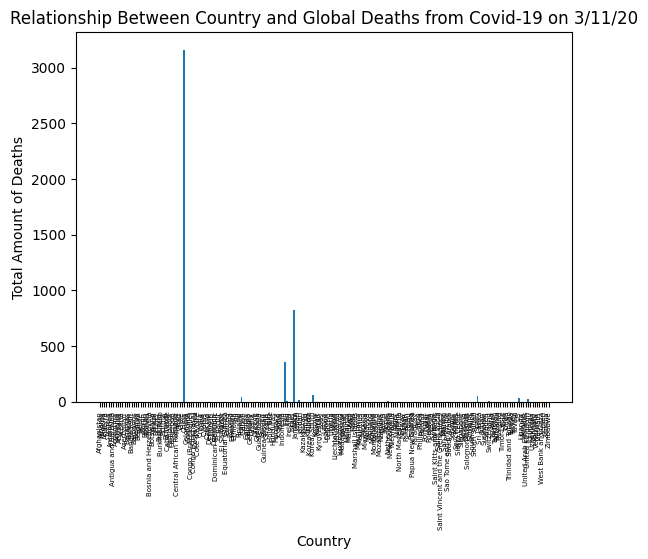

In [ ]:
#Country vs. Global Deaths
x = covid_death_df.index
y = covid_death_df["3/11/20"]
plt.bar(x,y)
plt.xlabel("Country")
plt.ylabel("Total Amount of Deaths")
plt.title("Relationship Between Country and Global Deaths from Covid-19 on 3/11/20")
plt.xticks(rotation = 90, fontsize=5)
plt.show()


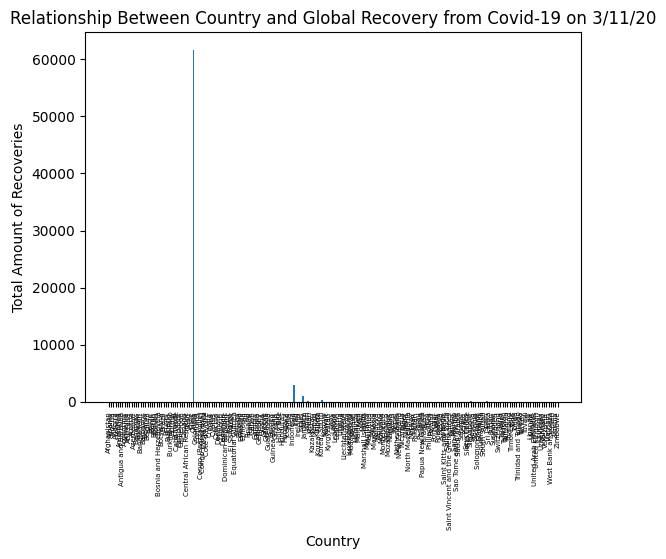

In [ ]:
#Date vs. Global Recovery
x = covid_recovery_df.index
y = covid_recovery_df["3/11/20"]
plt.bar(x,y)
plt.xlabel("Country")
plt.ylabel("Total Amount of Recoveries")
plt.title("Relationship Between Country and Global Recovery from Covid-19 on 3/11/20")
plt.xticks(rotation = 90,fontsize=5)

plt.show()


# Income Based Data

In [ ]:

print("\n".join(covid_death_df.index))

Afghanistan
Albania
Algeria
Andorra
Angola
Antarctica
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Korea, North
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
Madagascar
Malawi
Malaysia
Maldives
Mal

In [ ]:
#Based on World Bank.org 2020 data

In [1]:
income_levels_2020 ={"Afghanistan":
"Albania"
"Algeria"
"Andorra"
"Angola"
"Antarctica"
"Antigua and Barbuda"
"Argentina"
"Armenia"
"Australia"
"Austria"
"Azerbaijan"
"Bahamas"
"Bahrain"
"Bangladesh"
"Barbados"
"Belarus"
"Belgium"
"Belize"
"Benin"
"Bhutan"
"Bolivia"
"Bosnia and Herzegovina"
"Botswana"
"Brazil"
"Brunei"
"Bulgaria"
"Burkina Faso"
"Burma"
"Burundi"
"Cabo Verde"
"Cambodia"
"Cameroon"
"Canada"
"Central African Republic"
"Chad"
"Chile"
"China"
"Colombia"
"Comoros"
"Congo (Brazzaville)"
"Congo (Kinshasa)"
"Costa Rica"
"Cote d'Ivoire"
Croatia
Cuba
Cyprus
Czechia
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Korea, North
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Marshall Islands
Mauritania
Mauritius
Mexico
Micronesia
Moldova
Monaco
Mongolia
Montenegro
Morocco
Mozambique
Namibia
Nauru
Nepal
Netherlands
New Zealand
Nicaragua
Niger
Nigeria
North Macedonia
Norway
Oman
Pakistan
Palau
Panama
Papua New Guinea
Paraguay
Peru
Philippines
Poland
Portugal
Qatar
Romania
Russia
Rwanda
Saint Kitts and Nevis
Saint Lucia
Saint Vincent and the Grenadines
Samoa
San Marino
Sao Tome and Principe
Saudi Arabia
Senegal
Serbia
Seychelles
Sierra Leone
Singapore
Slovakia
Slovenia
Solomon Islands
Somalia
South Africa
South Sudan
Spain
Sri Lanka
Sudan
Suriname
Sweden
Switzerland
Syria
Taiwan*
Tajikistan
Tanzania
Thailand
Timor-Leste
Togo
Tonga
Trinidad and Tobago
Tunisia
Turkey
Tuvalu
US
Uganda
Ukraine
United Arab Emirates
United Kingdom
Uruguay
Uzbekistan
Vanuatu
Venezuela
Vietnam
West Bank and Gaza
Yemen
Zambia
Zimbabwe }

SyntaxError: unterminated string literal (detected at line 25) (ipython-input-1-1001463501.py, line 25)